# EDA dla azjatyckich tekstów religijnych
Dane pochodzą z projektu "Project Gutenberg", lecz zostały wcześniej przetworzone. Czyszczenie danych przeprowadzili **PREETI SAH i ERNEST FOKOUE w (2019) "WHAT DO ASIAN RELIGIONS HAVE IN COMMON? AN UNSUPERVISED TEXT ANALYTICS EXPLORATION"**. Analiza tekstu może nam odpowiedzieć na to jak podobne są do siebie te treści, a z drugiej strony jak specyficznego języka mogą używać różne kultury. Ciekawe czy uda się za pomocą metod uczenia bez nadzoru przyporządkować korpusy do pozycji literackich, z których pochodzą. Zbiór korpusów pochodzi z 8 tekstów.

1.Hinduism (India): Yogasutras, Upanishads   
2.Buddhism (Tibet): Four Noble Truth of Buddhism         
3.Taoism (China): Tao Te Ching                
4.Christianity (Central Asia/America): Book of Proverb, Book of Ecclesiastes, Book of Ec-clesiasticus, Book of Wisdom 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
import sklearn

In [6]:
#df=pd.read_csv("C:\\Users\\huber\\Dropbox\\PW\\2 SEMESTR\\Wstep do uczenia maszynowego\\AllBooks_baseline_DTM_Unlabelled.csv")
df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\AllBooks_baseline_DTM_Unlabelled.csv")

In [7]:
df.head()

,# foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Columns: 8266 entries, # foolishness to explains
dtypes: float64(8266)
memory usage: 37.2 MB


In [7]:
df.describe()

,# foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.003390,0.566102,0.006780,0.001695,0.032203,0.059322,0.001695,0.001695,0.006780,0.001695,...,0.003390,0.006780,0.003390,0.001695,0.001695,0.001695,0.079661,0.008475,0.005085,0.003390
std,0.058173,1.777487,0.082129,0.041169,0.488211,0.326851,0.041169,0.041169,0.082129,0.041169,...,0.058173,0.100701,0.058173,0.041169,0.041169,0.041169,0.366824,0.091744,0.071186,0.058173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,14.000000,1.000000,1.000000,11.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000


Można zauważyć, że mamy tutaj problem przekleństwa wymiarowości. Mamy do czynienia z macierzą o wymiarach 590 na 8266, na dodatek jest to macierz rzadka, to jest pełna zer. Kolumny stanowią indykatory zliczające wystąpienie danego słowa w korpusie. Każdy jeden fragment korpusu jest obserwacją. Zobaczmy czy jakieś charakterystyczne słowa występują najczęściej w tych tekstach.

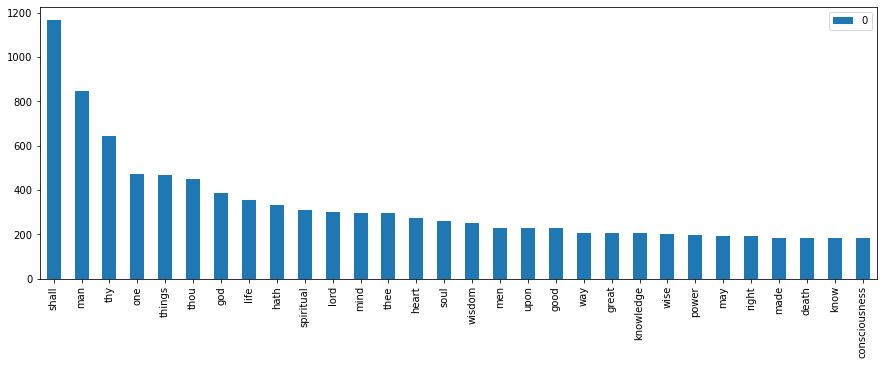

In [16]:
Names=pd.DataFrame(df.sum(axis=0))
#Names.index.name = 'newhead'
#Names.reset_index(inplace=True)
#Names.sort_values(by=0, ascending=False).iloc[0:30,]
#Names.columns=["Name", "Times"]
Names.sort_values(by=0, ascending=False).iloc[0:30,].plot(kind="bar", figsize=(15,5))
plt.show()

Jak widzimy niektóre pojawiają się naprawdę często, nie są one jednak na pierwszy rzut oka charakterystyczne dla jakichkolwiek tekstów. Może być jednak tak, że okaże się zupełnie co innego, bo tylko część z ksiąg będzie używała składni do której będą wymagane niektóre z tych słów. Przyjrzyjmy się z kolei tym rzadziej występującym słowom, będziemy tutaj szukać czy da się tutaj jakoś zmniejszyć wymiar naszych danych przez usunięcie słów, które występują bardzo rzadko albo w ogóle.

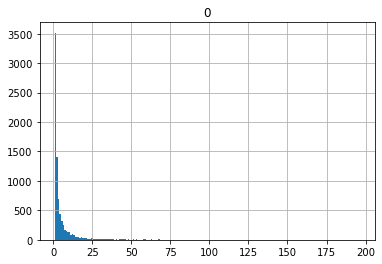

In [19]:
Names[Names<200].hist(bins=200)
plt.show()

In [20]:
Names.describe()

,0
count,8266.000000
mean,7.332325
std,27.331082
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,1168.000000


Jest bardzo dużo słów, które rzadko występują, ponad 50% z nich występuje 2 razy lub rzadziej. Takie kolumny będą dobrymi kandydatami do usunięcia, gdyż nie powinny wnosić nam dużo do modelu.

Sprawdźmy teraz jak mają się do siebie sumy użytych słów w poszczególnych księgach. Chcielibyśmy aby były one mniej więcej podobne, gdyż w przypadku dużych różnic w długościach algorytmy klasteryzacji mogą uznawać po prostu długie książki za podobne do siebie, mimo tego, że byłyby zupełnie inne.

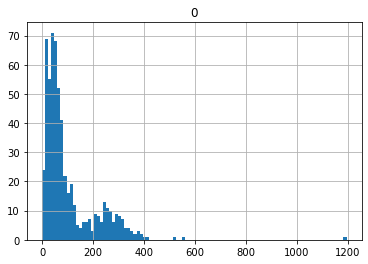

In [22]:
Books=pd.DataFrame(df.sum(axis=1))
#Names1.sort_values(by=0, ascending=False)[1:50]
Books.hist(bins=100)
plt.show()

Książki różnią się ilością zawieranych słów, jednak znaczna większość jest w przedziale 0-200. Powyżej 400 słów jest bardzo niewiele obserwacji.

In [16]:
from scipy.spatial.distance import pdist, squareform
scipy.spatial.distance.pdist(df, metric='euclidean')

TypeError: 'tuple' object is not callable

### PCA NIC NIE DAJE. RACZEJ SUABO

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df_standard = StandardScaler().fit_transform(df)
pca=PCA(n_components=100)
principalComponents = pca.fit_transform(df_standard)
principalDF = pd.DataFrame(data = principalComponents)
principalDF.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.307561,-3.815487,4.130378,1.431419,0.132662,-0.792371,-0.569811,1.542379,-1.184978,-0.168756,...,-1.757772,-0.085931,3.790145,1.143392,-6.689653,-2.500036,1.102119,0.748684,-2.093235,0.446350
1,0.917619,-4.038796,0.086038,2.154550,0.484465,0.021474,0.461968,-0.134943,0.122785,0.090644,...,1.361935,-0.891366,0.383530,-2.553719,-3.407472,0.413035,-0.408559,5.257064,-0.812572,0.347279
2,1.256734,-5.009150,1.440038,2.800878,0.538914,0.403178,-0.232503,-0.292149,0.502808,-0.414445,...,12.458326,4.075019,4.866515,2.953958,-0.900718,6.260421,3.105609,3.758526,-4.989528,1.553630
3,1.135506,-4.877551,1.753876,2.714462,0.803382,0.285985,0.384356,0.134762,0.191293,0.092367,...,0.286938,0.788528,0.719377,0.686775,-0.130243,4.145308,0.812450,0.992301,-2.620976,0.725006
4,-0.889743,-4.776239,-0.662157,1.717694,0.411503,0.295943,0.087985,-0.152366,0.110207,0.300429,...,-0.263198,-0.128466,0.362834,-0.410421,0.065500,-0.093513,-0.681085,0.482953,-0.120103,0.009270


In [21]:
sum(pca.explained_variance_ratio_)

0.4630010397339578

In [22]:
pca.explained_variance_ratio_

array([0.01813958, 0.01314244, 0.01076462, 0.00949435, 0.00831672,
       0.00801106, 0.00753476, 0.00703879, 0.0069344 , 0.0068672 ,
       0.00658159, 0.00650117, 0.00634651, 0.00608672, 0.00605214,
       0.00591948, 0.0057197 , 0.00567208, 0.00558869, 0.00538004,
       0.00531142, 0.00525337, 0.00518289, 0.00514975, 0.00509218,
       0.00503156, 0.00497438, 0.00493151, 0.00489314, 0.00486708,
       0.0048198 , 0.00478146, 0.00473481, 0.00468777, 0.00463597,
       0.00456756, 0.00450787, 0.00449448, 0.00444925, 0.00443683,
       0.00434311, 0.00433141, 0.00429826, 0.00426506, 0.00423994,
       0.00421717, 0.00419034, 0.00416983, 0.00411839, 0.00409435,
       0.00406873, 0.00402868, 0.00401322, 0.00397982, 0.00396464,
       0.00391638, 0.00390969, 0.00387901, 0.00381414, 0.00379253,
       0.00378034, 0.00375144, 0.00368769, 0.0036736 , 0.00364047,
       0.00362448, 0.00358277, 0.00353279, 0.00350336, 0.00346683,
       0.00344557, 0.00343444, 0.00339422, 0.0033806 , 0.00335

### Orginałka

In [118]:
TT = open('C:\\Users\\huber\\Dropbox\\PW\\2 SEMESTR\\Wstep do uczenia maszynowego\\Complete_data.txt', 'r')
TXT = TT.read()
TT.close()

In [163]:
import re
DF = re.split('\d+\.\d+', TXT)
DF1=pd.DataFrame(DF).iloc[1:592, ]
DF1=DF1.rename(columns={0:"txt"})
DF1

,txt
1,"\nÂ§ 1.The Buddha: ""What do you think, Rahula:..."
2,\nÂ§ 2.Once the Blessed One was staying at Kos...
3,"\nÂ§ 3.""'Stress should be known. The cause by ..."
4,"\nÂ§ 4.""Vision arose, clear knowing arose, dis..."
5,"\nÂ§ 5.Sariputta: ""There are these three forms..."
...,...
587,"\n 14:1. Again, another designing to sail, and..."
588,\ncondemning both the makers and the worshippe...
589,"\nworthily punished, and were destroyed by a m..."
590,"\n 17:1. For thy judgments, O Lord, are great,..."


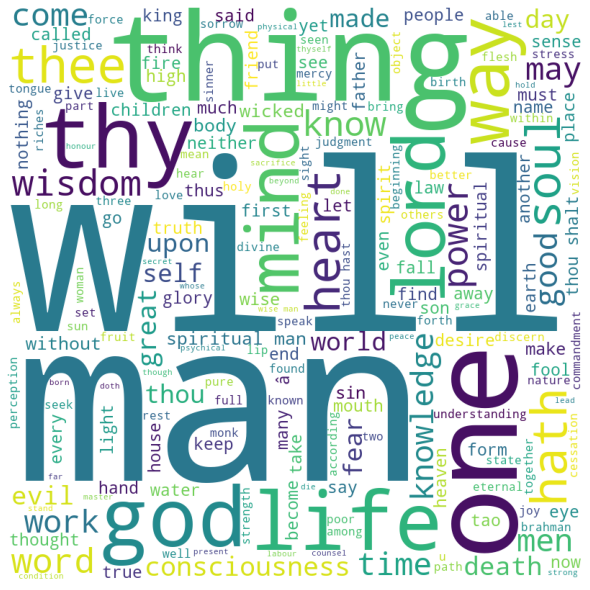

In [147]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in DF:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [165]:
#!pip install textblob
from textblob import TextBlob
DF1['polarity']=DF1.loc[:,'txt'].apply(lambda x:TextBlob(x).sentiment.polarity)
DF1['sentiment']=DF1.loc[:,'txt'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
DF1

,txt,polarity,sentiment
1,"\nÂ§ 1.The Buddha: ""What do you think, Rahula:...",-0.059836,0.395902
2,\nÂ§ 2.Once the Blessed One was staying at Kos...,0.117647,0.477941
3,"\nÂ§ 3.""'Stress should be known. The cause by ...",0.180979,0.547078
4,"\nÂ§ 4.""Vision arose, clear knowing arose, dis...",0.343080,0.664732
5,"\nÂ§ 5.Sariputta: ""There are these three forms...",0.000000,0.000000
...,...,...,...
587,"\n 14:1. Again, another designing to sail, and...",0.197806,0.568295
588,\ncondemning both the makers and the worshippe...,0.010802,0.569444
589,"\nworthily punished, and were destroyed by a m...",0.133667,0.569179
590,"\n 17:1. For thy judgments, O Lord, are great,...",-0.076437,0.650194


In [166]:
DF1.sort_values(by="polarity", ascending=True)

,txt,polarity,sentiment
202,\n He who is without discrimination and whose ...,-1.000,1.000000
163,\n He who knows the three-fold Nachiketa fire ...,-0.800,0.200000
361,"\nseen have not alto fallen away, since they s...",-0.505,0.615000
233,"\n O Gautama (Nachiketas), I shall declare unt...",-0.400,0.700000
301,"\nof the will, and through ceasing from self-i...",-0.360,0.533333
...,...,...,...
239,"\n There is one ruler, the Self of all living ...",0.700,0.900000
141,\n By the worship of the Unmanifested one end ...,0.700,0.900000
138,"\n By Vidya one end is attained; by Avidya, an...",0.700,0.900000
213,"\n The intelligent man, who has heard and repe...",0.800,0.900000


In [167]:
DF1.sort_values(by="polarity", ascending=False)

,txt,polarity,sentiment
207,"\n Beyond the senses are the objects, beyond t...",0.800,0.750000
213,"\n The intelligent man, who has heard and repe...",0.800,0.900000
141,\n By the worship of the Unmanifested one end ...,0.700,0.900000
138,"\n By Vidya one end is attained; by Avidya, an...",0.700,0.900000
239,"\n There is one ruler, the Self of all living ...",0.700,0.900000
...,...,...,...
301,"\nof the will, and through ceasing from self-i...",-0.360,0.533333
233,"\n O Gautama (Nachiketas), I shall declare unt...",-0.400,0.700000
361,"\nseen have not alto fallen away, since they s...",-0.505,0.615000
163,\n He who knows the three-fold Nachiketa fire ...,-0.800,0.200000


In [169]:
DF1.sort_values(by="sentiment", ascending=True)

,txt,polarity,sentiment
232,\n No mortal lives by the in-coming breath (Pr...,0.000000,0.0
189,\n This Word is indeed Brahman. This Word is ...,0.000000,0.0
273,\n He ran towards it and He (Brahman) said to ...,0.000000,0.0
183,\n I know that (earthly) treasure is transitor...,0.000000,0.0
274,"\n Brahman asked: ""What power resides in thee?...",0.000000,0.0
...,...,...,...
230,\n He it is who sends the (in-coming) Prana (l...,0.500000,1.0
202,\n He who is without discrimination and whose ...,-1.000000,1.0
10,"\nÂ§ 10.MahaKotthita: ""Feeling, perception, & ...",-0.333333,1.0
154,\n Yama said: O Brahmana! Revered guest! My ...,0.078125,1.0


In [168]:
DF1.sort_values(by="sentiment", ascending=False)

,txt,polarity,sentiment
272,"\n They said to Fire: ""O Jataveda (All-knowing...",0.000000,1.0
154,\n Yama said: O Brahmana! Revered guest! My ...,0.078125,1.0
271,\n The Brahman perceived this and appeared bef...,0.000000,1.0
230,\n He it is who sends the (in-coming) Prana (l...,0.500000,1.0
202,\n He who is without discrimination and whose ...,-1.000000,1.0
...,...,...,...
13,"\nÂ§ 13. Fabrications.Â§ 13.""And what are fabr...",0.000000,0.0
134,\n He who sees all beings in the Self and the ...,0.000000,0.0
146,"\n Vahasrava, being desirous of heavenly rewar...",0.000000,0.0
222,"\n From whence the sun rises, and whither it g...",0.000000,0.0
